# Demonstration of Wasserstein Discriminant Analysis

In [7]:
import numpy as np
import matplotlib.pylab as pl
import ot
from ot.datasets import get_1D_gauss as gauss
from ot.dr import wda, fda

### Generate dataset

In [2]:
n=1000 # nb samples in source and target datasets
nz=0.2

# generate circle dataset
t=np.random.rand(n)*2*np.pi
ys=np.floor((np.arange(n)*1.0/n*3))+1
xs=np.concatenate((np.cos(t).reshape((-1,1)),np.sin(t).reshape((-1,1))),1)
xs=xs*ys.reshape(-1,1)+nz*np.random.randn(n,2)

t=np.random.rand(n)*2*np.pi
yt=np.floor((np.arange(n)*1.0/n*3))+1
xt=np.concatenate((np.cos(t).reshape((-1,1)),np.sin(t).reshape((-1,1))),1)
xt=xt*yt.reshape(-1,1)+nz*np.random.randn(n,2)

nbnoise=8

xs=np.hstack((xs,np.random.randn(n,nbnoise)))
xt=np.hstack((xt,np.random.randn(n,nbnoise)))

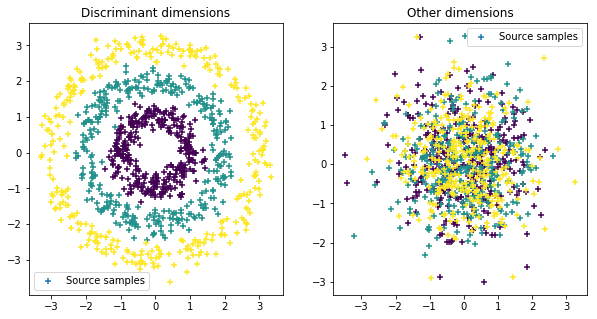

In [3]:
pl.figure(1,(10,5))

pl.subplot(1,2,1)
pl.scatter(xt[:,0],xt[:,1],c=ys,marker='+',label='Source samples')
pl.legend(loc=0)
pl.title('Discriminant dimensions')

pl.subplot(1,2,2)
pl.scatter(xt[:,2],xt[:,3],c=ys,marker='+',label='Source samples')
pl.legend(loc=0)
pl.title('Other dimensions')
pl.show()

### Compute Fisher discriminant

In [4]:
p=2

Pfda,projfda = fda(xs,ys,p)

### Compute WDA

In [5]:
p=2
reg=1
k=10
maxiter=100

Pwda,projwda = wda(xs,ys,p,reg,k,maxiter=maxiter)


Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+7.3324064745743989e-01	5.95226695e-01
    2	+4.4853951178403229e-01	8.20231271e-02
    3	+4.4576445851595303e-01	1.93811424e-01
    4	+4.3562246733680465e-01	1.61725387e-01
    5	+4.0969564472790077e-01	1.32513662e-01
    6	+2.9388094458668662e-01	2.00393708e-01
    7	+2.7344485803563923e-01	1.99320846e-01
    8	+2.2883182995370804e-01	2.82035999e-02
    9	+2.2828598049696755e-01	7.08646563e-03
   10	+2.2825222787200100e-01	3.22559822e-04
   11	+2.2825220998825529e-01	2.82197677e-04
   12	+2.2825216255973643e-01	9.26049149e-05
   13	+2.2825215676825239e-01	6.60508771e-06
   14	+2.2825215674473881e-01	3.35243645e-06
   15	+2.2825215673980734e-01	1.97305673e-06
   16	+2.2825215673953242e-01	1.86785394e-06
   17	+2.2825215673856641e-01	1.41420230e-06
   18	+2.2825215673757782e-01	6.92577574e-07
Terminated - min grad norm reached after 18 iterations, 8.84 seconds.



### Project and plot samples

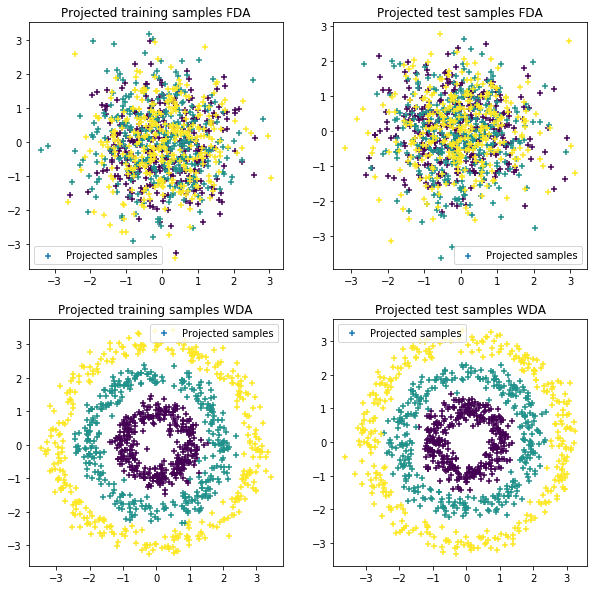

In [6]:
# data projection (also removes center)
xsp=projfda(xs)
xtp=projfda(xt)

xspw=projwda(xs)
xtpw=projwda(xt)

pl.figure(1,(10,10))

pl.subplot(2,2,1)
pl.scatter(xsp[:,0],xsp[:,1],c=ys,marker='+',label='Projected samples')
pl.legend(loc=0)
pl.title('Projected training samples FDA')


pl.subplot(2,2,2)
pl.scatter(xtp[:,0],xtp[:,1],c=ys,marker='+',label='Projected samples')
pl.legend(loc=0)
pl.title('Projected test samples FDA')


pl.subplot(2,2,3)
pl.scatter(xspw[:,0],xspw[:,1],c=ys,marker='+',label='Projected samples')
pl.legend(loc=0)
pl.title('Projected training samples WDA')


pl.subplot(2,2,4)
pl.scatter(xtpw[:,0],xtpw[:,1],c=ys,marker='+',label='Projected samples')
pl.legend(loc=0)
pl.title('Projected test samples WDA')
pl.show()